# Analysis of Antibiotics Prescription and Hospitalisation Risk

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import os
import glob
import gzip
from matplotlib.ticker import PercentFormatter
%matplotlib inline

In [201]:
#os.chdir("..")
current_working_dir = os.getcwd()
print(current_working_dir)

c:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit


In [202]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [203]:
def makeFilePath(pathFromWorkspace, fileName):
    workingdir = "/workspace/" if (os.name != "nt") else ""
    filepath = workingdir+pathFromWorkspace+fileName

    return filepath

In [204]:
input_20190101_file_path = makeFilePath("output/hospitalisation_data/", "input_hospitalisation_2019-01-01.csv.gz")
data201901 = pd.read_csv(input_20190101_file_path, compression='gzip')
data201901['date'] = '2019-01-01'

In [205]:
input_20190201_file_path = makeFilePath("output/hospitalisation_data/", "input_hospitalisation_2019-02-01.csv.gz")
data201902 = pd.read_csv(input_20190201_file_path, compression='gzip')
data201902['date'] = '2019-02-01'
data201902 = data201901.append(data201902, ignore_index=True)
#data201902.head(3)

In [206]:
input_20190301_file_path = makeFilePath("output/hospitalisation_data/", "input_hospitalisation_2019-03-01.csv.gz")
data201903 = pd.read_csv(input_20190301_file_path, compression='gzip')
data201903['date'] = '2019-03-01'
data201903 = data201902.append(data201903, ignore_index=True)
#data201903.head(3)

In [207]:
input_20190401_file_path = makeFilePath("output/hospitalisation_data/", "input_hospitalisation_2019-04-01.csv.gz")
data201904 = pd.read_csv(input_20190401_file_path, compression='gzip')
data201904['date'] = '2019-04-01'
data = data201903.append(data201904, ignore_index=True)
#data.head(3)

In [208]:
# data201901 = pd.read_csv(r'../output/measures/input_2019-01-01.csv.gz', compression='gzip')
# data201901['date'] = '2019-01-01'
# #data201901.head(3)

In [209]:
# data201902 = pd.read_csv(r'../output/measures/input_2019-02-01.csv.gz', compression='gzip')
# data201902['date'] = '2019-02-01'
# data201902 = data201901.append(data201902, ignore_index=True)
# #data201902.head(3)

In [210]:
# data201903 = pd.read_csv(r'../output/measures/input_2019-03-01.csv.gz', compression='gzip')
# data201903['date'] = '2019-03-01'
# data201903 = data201902.append(data201903, ignore_index=True)
# #data201903.head(3)

In [211]:
# data201904 = pd.read_csv(r'../output/measures/input_2019-04-01.csv.gz', compression='gzip')
# data201904['date'] = '2019-04-01'
# data = data201903.append(data201904, ignore_index=True)
# data.head(3)

In [212]:
data.columns

Index(['bmi_date_measured', 'smoking_status_date',
       'most_recent_unclear_smoking_cat_date', 'flu_vaccine_med',
       'flu_vaccine_clinical', 'antibacterial_prescriptions_date',
       'sgss_positive', 'primary_care_covid', 'covrx1_dat', 'covrx2_dat',
       'admitted_date', 'died_date', 'uti_date_1', 'uti_date_2', 'uti_date_3',
       'uti_date_4', 'lrti_date_1', 'lrti_date_2', 'lrti_date_3',
       'lrti_date_4', 'age', 'age_cat', 'sex', 'practice', 'region', 'msoa',
       'imd', 'bmi', 'ethnicity', 'smoking_status', 'gp_count',
       'flu_vaccine_tpp', 'flu_vaccine', 'antibacterial_prescriptions',
       'antibacterial_brit', 'broad_spectrum_antibiotics_prescriptions',
       'admitted', 'uti_counts', 'lrti_counts', 'urti_counts',
       'sinusitis_counts', 'ot_externa_counts', 'otmedia_counts', 'uti_pt',
       'lrti_pt', 'urti_pt', 'sinusitis_pt', 'ot_externa_pt', 'otmedia_pt',
       'uti_ab_count_1', 'uti_ab_count_2', 'uti_ab_count_3', 'uti_ab_count_4',
       'lrti_ab_c

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 76 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   bmi_date_measured                         3800 non-null   object 
 1   smoking_status_date                       400 non-null    object 
 2   most_recent_unclear_smoking_cat_date      400 non-null    object 
 3   flu_vaccine_med                           400 non-null    object 
 4   flu_vaccine_clinical                      400 non-null    object 
 5   antibacterial_prescriptions_date          6 non-null      object 
 6   sgss_positive                             400 non-null    object 
 7   primary_care_covid                        400 non-null    object 
 8   covrx1_dat                                0 non-null      float64
 9   covrx2_dat                                0 non-null      float64
 10  admitted_date                       

In [214]:
data.describe(include='all')

,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,antibacterial_prescriptions_date,sgss_positive,primary_care_covid,covrx1_dat,covrx2_dat,...,hiv_comor,metastatic_cancer_comor,mild_liver_comor,mod_severe_liver_comor,mod_severe_renal_comor,mi_comor,peptic_ulcer_comor,peripheral_vascular_comor,patient_id,date
count,3800,400,400,400,400,6,400,400,0.0,0.0,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000
unique,35,35,35,13,7,6,339,343,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,2021-03,2020-12,2021-04,2018-12,2018-07,2019-01-15,2020-09-06,2021-05-22,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01
freq,137,19,23,38,76,1,3,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,4995.856500,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.300038,0.300038,0.300038,0.300038,0.300038,0.300038,0.300038,0.300038,2878.533251,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2541.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4931.500000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7478.500000,NaN


## Data Preparation

In [215]:
data.columns

Index(['bmi_date_measured', 'smoking_status_date',
       'most_recent_unclear_smoking_cat_date', 'flu_vaccine_med',
       'flu_vaccine_clinical', 'antibacterial_prescriptions_date',
       'sgss_positive', 'primary_care_covid', 'covrx1_dat', 'covrx2_dat',
       'admitted_date', 'died_date', 'uti_date_1', 'uti_date_2', 'uti_date_3',
       'uti_date_4', 'lrti_date_1', 'lrti_date_2', 'lrti_date_3',
       'lrti_date_4', 'age', 'age_cat', 'sex', 'practice', 'region', 'msoa',
       'imd', 'bmi', 'ethnicity', 'smoking_status', 'gp_count',
       'flu_vaccine_tpp', 'flu_vaccine', 'antibacterial_prescriptions',
       'antibacterial_brit', 'broad_spectrum_antibiotics_prescriptions',
       'admitted', 'uti_counts', 'lrti_counts', 'urti_counts',
       'sinusitis_counts', 'ot_externa_counts', 'otmedia_counts', 'uti_pt',
       'lrti_pt', 'urti_pt', 'sinusitis_pt', 'ot_externa_pt', 'otmedia_pt',
       'uti_ab_count_1', 'uti_ab_count_2', 'uti_ab_count_3', 'uti_ab_count_4',
       'lrti_ab_c

In [216]:
# define dictionaries

dict_sex = {'F': 'Female', 'M': 'Male'}
dict_ethnicity = {1: 'White', 2: 'Mixed', 3: 'Asian', 4: 'Black', 5: 'Other', 0: 'Unknown', np.nan: 'Unknown'}
dict_smoking = {'E': 'Ex-smoker', 'M': 'Unknown', 'S': 'Smoker', 'N': 'Never smoked'}
dict_imd = {0: 'Unknown', 1: '1 (most deprived)', 2: '2', 3: '3', 4: '4', 5: '5 (least deprived)', np.nan: 'Unknown'}
dict_flu = {0: 'No', 1: 'Yes'}

In [217]:
# reoplace values of dictionaries with existing ones

data = data.replace({"sex": dict_sex})
data = data.replace({"ethnicity": dict_ethnicity})
data = data.replace({"smoking_status": dict_smoking})
data = data.replace({"imd": dict_imd})
data = data.replace({"flu_vaccine": dict_flu})

In [218]:
#prep before plot

data['age'][data['age'] < 0] = np.nan

## remove died cases
#data.died_date.value_counts()

# remove cases with bmi equal 0
data['bmi'][data['bmi'] == 0] = np.nan

# remove cases with negative gp_count
data['gp_count'][data['gp_count'] < 0] = np.nan

# Negative GP consultations mean what? Shall I remove them?

## Plots continuous factors

In [219]:
# function to generate histogram plots
def create_histplot(title, df, ax):
    ax.hist(df, color = 'purple', edgecolor = 'black', bins=20)
    ax.set_title(title)
    ax.set_ylabel('Frequency')
    ax.xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=0)

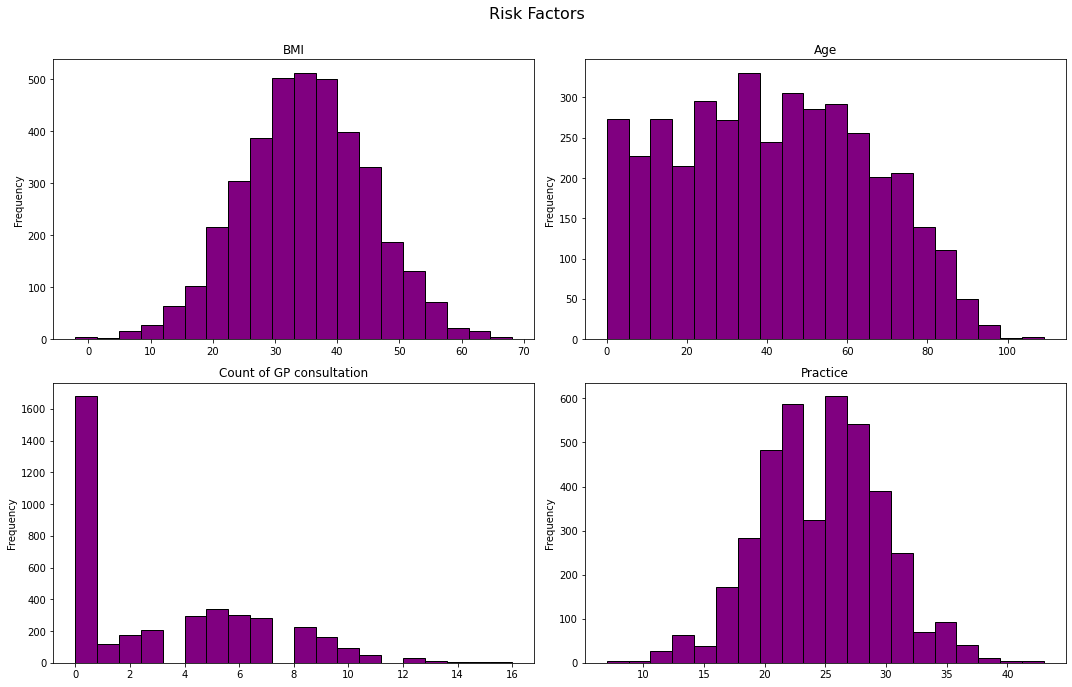

In [220]:
fig, axes = plt.subplots(2,2, 
                        figsize=(15, 10)
                        )
create_histplot('BMI', data['bmi'], axes[0,0])
create_histplot('Age', data['age'], axes[0,1])
create_histplot('Count of GP consultation', data['gp_count'], axes[1,0])
create_histplot('Practice', data['practice'], axes[1,1])
#fig.delaxes(ax=axes[1,1])

fig.suptitle('Risk Factors', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
plt.savefig('../output/hospitalisation_risk/risk_factors_cont.jpg')
plt.show()

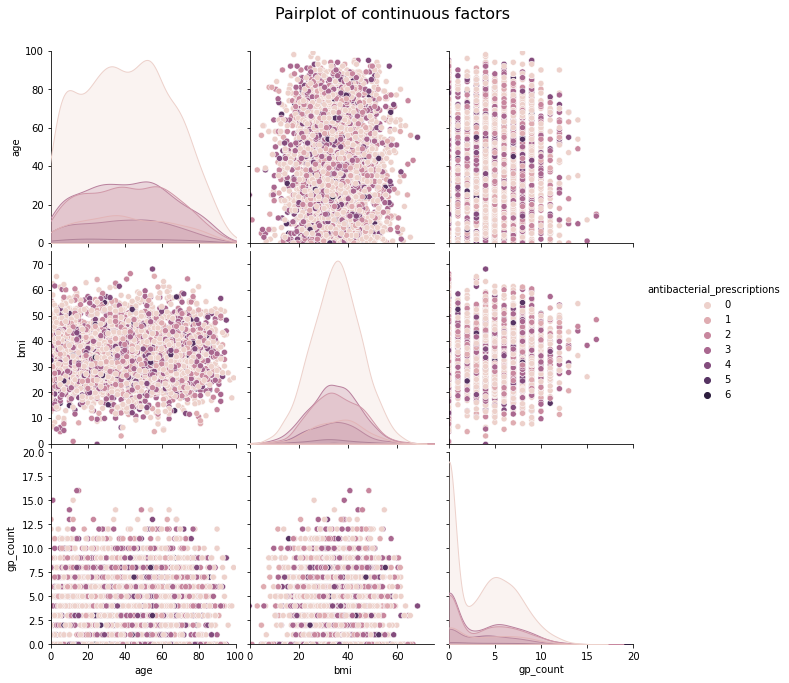

In [221]:
p = sns.pairplot(data, vars=['age', 'bmi', 'gp_count'#, 'practice'
                             ], 
                hue = 'antibacterial_prescriptions', 
#                kind='reg', 
                #markers=["o", "s"], 
                diag_kind="kde",#"hist"
#                plot_kws={#'line_kws':{'color':'red'}, 
#                'scatter_kws': {'alpha': 0.2}}, 
                height = 3)

p.axes[0,2].set_xlim((0,20))
p.axes[0,2].set_ylim((0,100))

p.axes[1,1].set_xlim((0,75))
p.axes[1,1].set_ylim((0,75))

p.axes[2,0].set_xlim((0,100))
p.axes[2,0].set_ylim((0,20))

plt.suptitle('Pairplot of continuous factors', fontsize=16, y=1.05)
plt.savefig('../output/hospitalisation_risk/risk_factors_cont_pairplot.jpg')
plt.show()

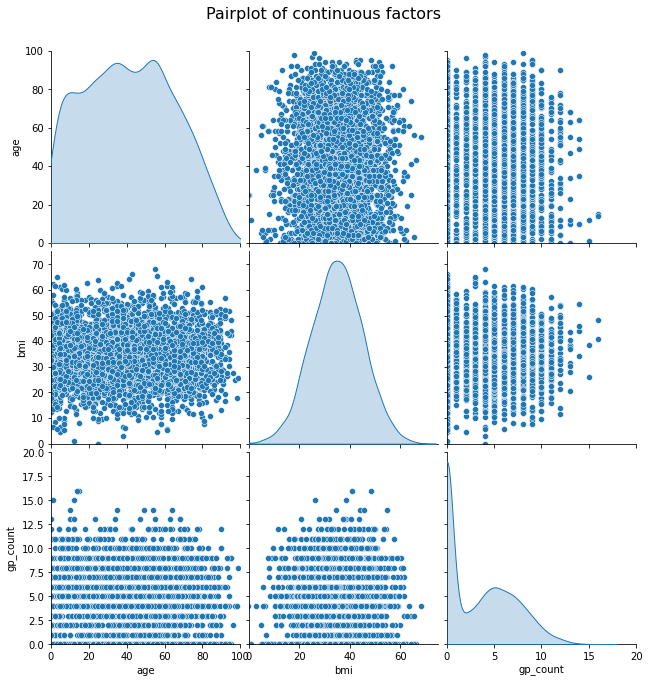

In [222]:
p = sns.pairplot(data, vars=['age', 'bmi', 'gp_count'#, 'practice'
                             ], 
                #hue = 'admitted', 
#                kind='reg', 
                #markers=["o", "s"], 
#                diag_kind="kde",#"hist"
#                plot_kws={#'line_kws':{'color':'red'}, 
#                'scatter_kws': {'alpha': 0.2}}, 
                height = 3)

p.axes[0,2].set_xlim((0,20))
p.axes[0,2].set_ylim((0,100))

p.axes[1,1].set_xlim((0,75))
p.axes[1,1].set_ylim((0,75))

p.axes[2,0].set_xlim((0,100))
p.axes[2,0].set_ylim((0,20))

plt.suptitle('Pairplot of continuous factors', fontsize=16, y=1.05)
plt.savefig('../output/hospitalisation_risk/risk_factors_cont_pairplot2.jpg')
plt.show()

## Plot categorical factors

In [223]:
def create_lineplot(var, title, ax1):
    a = data.groupby(['date', var]).size().reset_index()
    a.columns = ['date', var, 'Freq']
    sns.lineplot(x='date', y='Freq', 
            hue=var, 
            data=a,
            ax=ax1)
    ax1.set_title(title)
    ax1.set_ylabel('Frequency')
    ax1.xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=25)

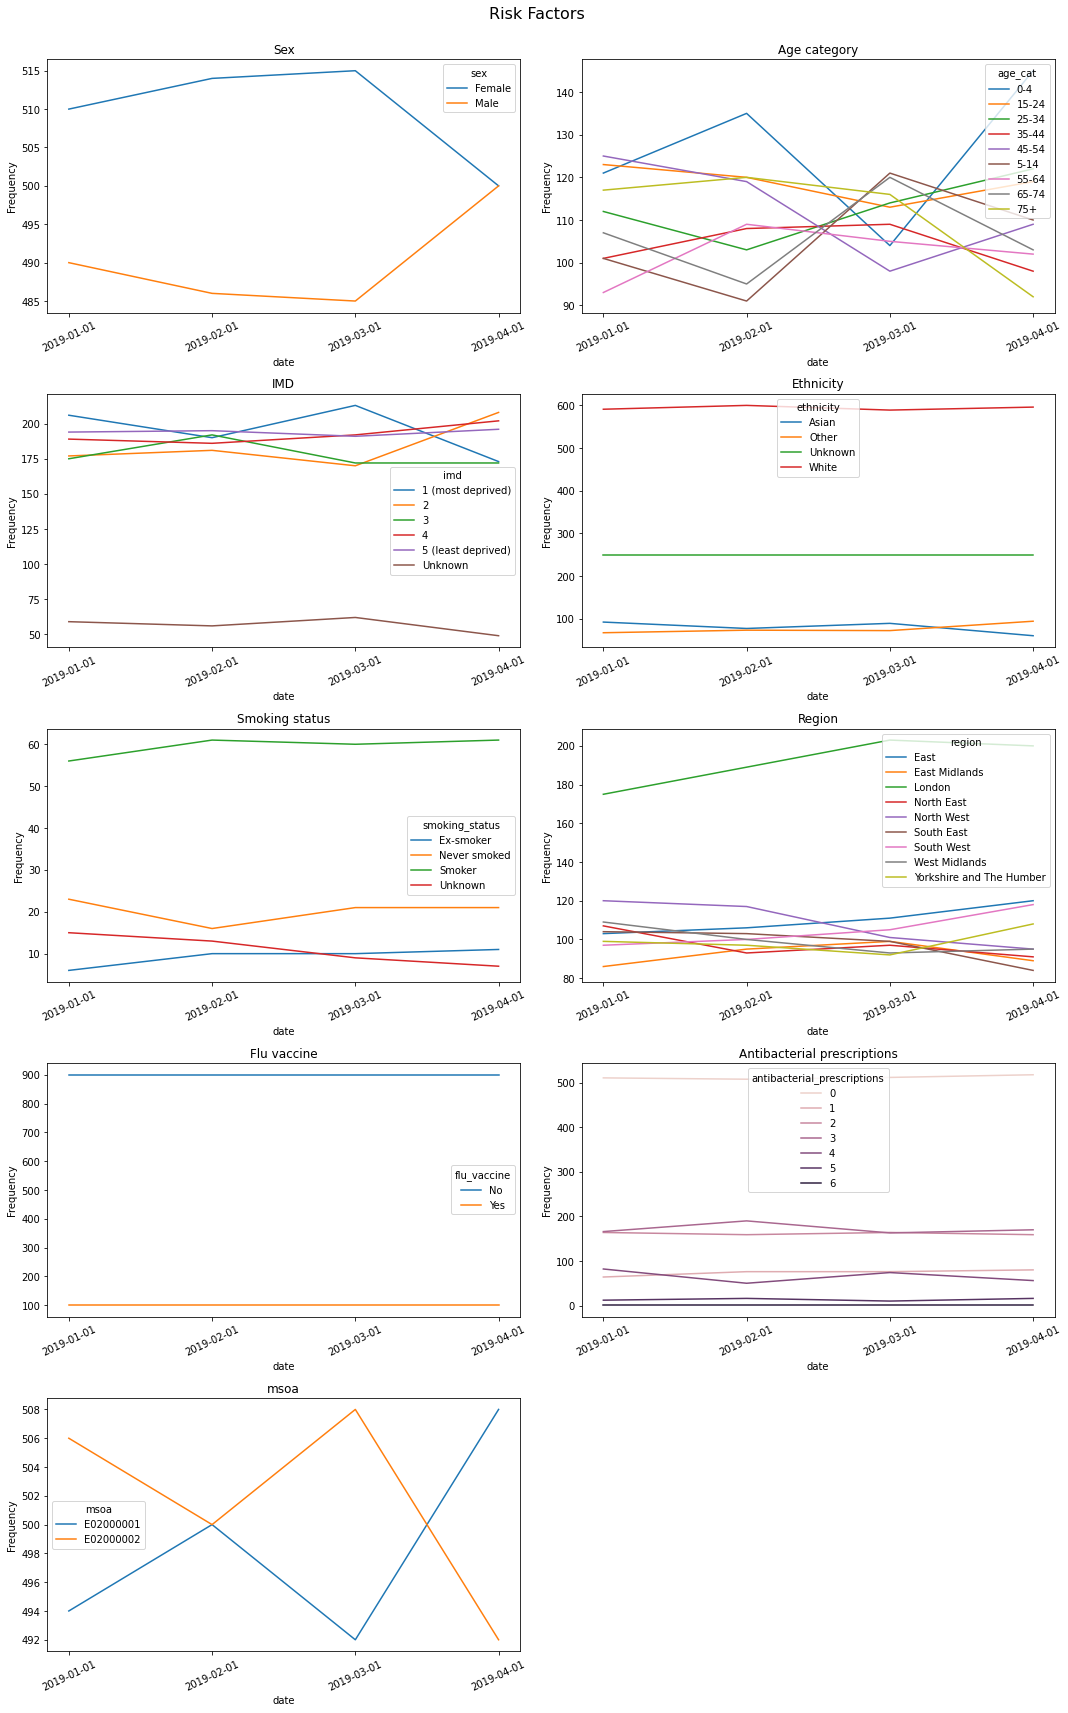

In [224]:
fig, axes = plt.subplots(5,2,
                        figsize=(15, 25)
                        )
create_lineplot('sex', 'Sex', axes[0,0])
create_lineplot('age_cat', 'Age category', axes[0,1])
create_lineplot('imd', 'IMD', axes[1,0])
create_lineplot('ethnicity', 'Ethnicity', axes[1,1])
create_lineplot('smoking_status', 'Smoking status', axes[2,0])
create_lineplot('region', 'Region', axes[2,1])
create_lineplot('flu_vaccine', 'Flu vaccine', axes[3,0])
create_lineplot('antibacterial_prescriptions', 'Antibacterial prescriptions', axes[3,1])
create_lineplot('msoa', 'msoa', axes[4,0])
fig.delaxes(ax=axes[4,1])

fig.suptitle('Risk Factors', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
plt.savefig('../output/hospitalisation_risk/risk_factors_cat.jpg')
plt.show()

### Calculating Chalson Comorbidity Index
Based on: https://www.nature.com/articles/4500889.pdf?origin=ppub

In [225]:
data['CCI'] = np.nan
col0 = data.columns.get_loc('CCI')

col1 = data.columns.get_loc('cancer_comor')
col2 = data.columns.get_loc('cardiovascular_comor')
col3 = data.columns.get_loc('chronic_obstructive_pulmonary_comor') ##
col4 = data.columns.get_loc('heart_failure_comor') ##
col5 = data.columns.get_loc('connective_tissue_comor')
col6 = data.columns.get_loc('dementia_comor')
col7 = data.columns.get_loc('diabetes_comor')
col8 = data.columns.get_loc('diabetes_complications_comor')
col9 = data.columns.get_loc('hemiplegia_comor')
col10 = data.columns.get_loc('hiv_comor')
col11 = data.columns.get_loc('metastatic_cancer_comor')
col12 = data.columns.get_loc('mild_liver_comor')
col13 = data.columns.get_loc('mod_severe_liver_comor')
col14 = data.columns.get_loc('mod_severe_renal_comor')
col15 = data.columns.get_loc('mi_comor')
col16 = data.columns.get_loc('peptic_ulcer_comor')
col17 = data.columns.get_loc('peripheral_vascular_comor')

col18 = data.columns.get_loc('age')

In [226]:
for idx, x in enumerate(data['CCI']):
    n=0
    #comorbidity component
    if data.iat[idx, col15] == 1:
        n=n+1
    if data.iat[idx, col2] == 1:
        n=n+1 
    if data.iat[idx, col17] == 1:
        n=n+1 
    if data.iat[idx, col3] == 1:
        n=n+1
    if data.iat[idx, col7] == 1:
        n=n+1
    if data.iat[idx, col6] == 1:
        n=n+1
    if data.iat[idx, col16] == 1:
        n=n+1
    if data.iat[idx, col5] == 1:
        n=n+1
    if data.iat[idx, col12] == 1:
        n=n+1
    
    if data.iat[idx, col9] == 1:
        n=n+2
    if data.iat[idx, col14] == 1:
        n=n+2
    if data.iat[idx, col8] == 1:
        n=n+2
    if data.iat[idx, col1] == 1:
        n=n+2
    #if data.iat[idx, col5] == 1: # Leukaemia
    #    n=n+2
    #if data.iat[idx, col12] == 1: # Lymphoma
    #    n=n+2

    if data.iat[idx, col13] == 1:
        n=n+3

    if data.iat[idx, col11] == 1:
        n=n+6
    if data.iat[idx, col10] == 1:
        n=n+6

    #age component
    if data.iat[idx, col18] <= 40:
        n=n+0
    if data.iat[idx, col18] > 40 and data.iat[idx, col18] <= 50:
        n=n+1
    if data.iat[idx, col18] > 50 and data.iat[idx, col18] <= 60:
        n=n+2
    if data.iat[idx, col18] > 60 and data.iat[idx, col18] <= 70:
        n=n+3
    if data.iat[idx, col18] > 70:# and data.iat[idx, col18] <= 80:
        n=n+4
    
    data.iat[idx, col0]=n

In [227]:
data.CCI.value_counts()

2.0     551
3.0     512
4.0     491
1.0     430
5.0     373
0.0     368
6.0     290
7.0     250
8.0     215
9.0     146
10.0    123
11.0     85
12.0     64
13.0     42
14.0     22
15.0     21
16.0     11
17.0      2
19.0      2
18.0      2
Name: CCI, dtype: int64

## Hospital admissions related to infections 

Q1- should we not exclude those who are admitted due to covid, not those who were diagnosed with covid 3 months before or two weeks after?

Q2- what is the difference between primary_care_covid and sgss_positive? seems like the first one is broader, right?

### 1- Data preparation for hospital admission prediction with negative binomial regression
This includes data type conversion and exclusion of cases that are not considered in the infection-related hospital admission, i.e. those who were diagnosed with Covid19 three months (=90 days) before and one month (=30 days) after hospital admission. 

In [228]:
data['primary_care_covid'] = data['primary_care_covid'].astype('datetime64[ns]')
data['sgss_positive'] = data['sgss_positive'].astype('datetime64[ns]')
data['admitted_date'] = data['admitted_date'].astype('datetime64[ns]')

In [229]:
# exclusion
# calculation of delta of hospital admission date and primary care diagnosis of covid
data['delta_primary_care_covid_admitted'] = (data['admitted_date'] - data['primary_care_covid']).dt.days
data['delta_primary_care_covid_admitted'].value_counts()

-89.0     2
-255.0    2
 616.0    2
-161.0    2
-86.0     2
         ..
-83.0     1
-344.0    1
 316.0    1
-201.0    1
 101.0    1
Name: delta_primary_care_covid_admitted, Length: 116, dtype: int64

In [230]:
data['delta_primary_care_covid_admitted'][data['delta_primary_care_covid_admitted'] > 990] = np.nan ###it must be 90
data['delta_primary_care_covid_admitted'][data['delta_primary_care_covid_admitted'] < -930] = np.nan ### it must be -30
data['delta_primary_care_covid_admitted'].value_counts()

-89.0     2
-255.0    2
 616.0    2
-161.0    2
-86.0     2
         ..
-83.0     1
-344.0    1
 316.0    1
-201.0    1
 101.0    1
Name: delta_primary_care_covid_admitted, Length: 116, dtype: int64

In [231]:
# select patients whom their delta date is between 90 and -30
data_hosp = data[~data['delta_primary_care_covid_admitted'].isnull()]
data_hosp.head()

,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,antibacterial_prescriptions_date,sgss_positive,primary_care_covid,covrx1_dat,covrx2_dat,...,mild_liver_comor,mod_severe_liver_comor,mod_severe_renal_comor,mi_comor,peptic_ulcer_comor,peripheral_vascular_comor,patient_id,date,CCI,delta_primary_care_covid_admitted
18,2020-11,2019-08,NaN,NaN,2018-09,NaN,NaT,2021-03-14,NaN,NaN,...,0,0,0,0,0,0,843,2019-01-01,10.0,-292.0
29,2020-03,NaN,NaN,NaN,NaN,NaN,NaT,2021-09-30,NaN,NaN,...,0,0,0,0,0,0,4691,2019-01-01,2.0,-433.0
79,2019-04,NaN,NaN,NaN,NaN,NaN,NaT,2020-01-20,NaN,NaN,...,0,0,0,0,0,0,2204,2019-01-01,1.0,-349.0
129,2019-03,NaN,2021-02,NaN,NaN,NaN,2020-07-01,2020-11-18,NaN,NaN,...,0,0,0,0,0,0,4895,2019-01-01,3.0,-552.0
154,2020-11,NaN,NaN,NaN,NaN,NaN,NaT,2020-12-21,NaN,NaN,...,0,0,0,0,0,0,2696,2019-01-01,1.0,-398.0


### 2- Negative binomial regression

For negative binomial regression (NB2), a 5-step method is proposed in https://timeseriesreasoning.com/contents/negative-binomial-regression-model/. These steps are:
<ol>
  <li>Poisson regression to obtain the vector of fitted rates of lambda.</li>
  <li>Auxiliary OLS (ordinary least squares) regression to obtain the value of alpha.</li>
  <li>Fit NB2 regression model to the data with the obtained alpha.</li>
  <li>Fit NB2 model to the test data set and test the goodness of the model.</li>
</ol>

In [232]:
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [233]:
data.admitted.value_counts()

0    3600
1     400
Name: admitted, dtype: int64

#### 2-1- Poisson regression for lambda calculation

In [234]:
# define a column of month and day
data_hosp['admitted_month'] = data_hosp.admitted_date.dt.month
data_hosp['admitted_day'] = data_hosp.admitted_date.dt.day

In [250]:
# split data into 80% training and 20% testing
mask = np.random.rand(len(data_hosp)) < 0.8
data_hosp_train = data_hosp[mask]
data_hosp_test = data_hosp[~mask]
print(f'data train: {data_hosp_train.shape}')
print(f'data test: {data_hosp_test.shape}')

data train: (95, 80)
data test: (30, 80)


In [236]:
# set up a regression expression
expr_data_hosp = """admitted ~ admitted_month + admitted_day + age + sex + imd"""
#expr_data_hosp = """admitted ~ admitted_date + age + sex + imd"""

In [251]:
# set up the training and testing of the poisson regression
y_train, X_train = dmatrices(expr_data_hosp, data_hosp_train, return_type='dataframe')
y_test, X_test = dmatrices(expr_data_hosp, data_hosp_test, return_type='dataframe')

In [252]:
print(f'y_train: {y_train.shape}')
print(f'X_train: {X_train.shape}')
print(f'y_test: {y_test.shape}')
print(f'X_test: {X_test.shape}')

y_train: (95, 1)
X_train: (95, 10)
y_test: (30, 1)
X_test: (30, 10)


In [259]:
X_train.head()

,Intercept,sex[T.Male],imd[T.2],imd[T.3],imd[T.4],imd[T.5 (least deprived)],imd[T.Unknown],admitted_month,admitted_day,age
18,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,26.0,41.0
29,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0,9.0
129,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,16.0,53.0
271,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,18.0
299,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,6.0,67.0


In [258]:
X_test.head()

,Intercept,sex[T.Male],imd[T.2],imd[T.3],imd[T.4],imd[T.5 (least deprived)],imd[T.Unknown],admitted_month,admitted_day,age
79,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0,45.0
154,1.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,19.0,47.0
243,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,29.0,70.0
320,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,22.0,20.0
321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,26.0,39.0


In [242]:
# from sklearn.model_selection import train_test_split
# X = data_hosp[['admitted_month', 'admitted_day', 'age', 'sex', 'imd']]
# y = data_hosp['admitted']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [255]:
# print(f'y_train: {y_train.shape}')
# print(f'X_train: {X_train.shape}')
# print(f'y_test: {y_test.shape}')
# print(f'X_test: {X_test.shape}')

In [256]:
# X_train

In [257]:
# X_test

In [187]:
# use generalised linear models (GLM) class of statsmodels package to train the poisson regression model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [188]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               admitted   No. Observations:                   92
Model:                            GLM   Df Residuals:                       82
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.036
Date:                Thu, 25 Nov 2021   Deviance:                       12.071
Time:                        17:31:31   Pearson chi2:                     21.6
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2014
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [189]:
# print the vectore of fitted rates of lambda produced by the training
print(poisson_training_results.mu)

[8.93825836e-02 2.73703169e-11 9.21966390e-02 8.53304463e-12
 9.56730181e-11 1.07695690e-01 3.97575395e-11 6.52241109e-11
 1.18935351e-01 2.47865441e-03 3.14298158e-12 3.29477022e-11
 3.96016007e-12 1.74310506e-10 8.87563143e-11 3.87964948e-02
 5.13720022e-11 2.86703818e-11 9.29326352e-11 1.53403473e-02
 5.34481491e-02 3.61851641e-02 1.58689301e-11 1.45754019e-11
 4.96374542e-01 6.78547724e-12 5.57191533e-02 7.00359653e-11
 2.27413190e-02 1.21483957e-11 3.10487879e-12 3.63664023e-12
 6.01496864e-03 1.24321977e-02 7.18110939e-11 2.36052988e-11
 8.64013105e-02 9.72525175e-02 3.28095471e-11 1.76178643e-01
 2.04238944e-12 2.64225682e-12 1.22358739e-11 1.28412033e-11
 2.45352814e-10 2.24934247e-01 1.67662034e-10 1.33349213e-10
 1.03162017e-03 8.77033606e-13 9.04770006e-01 4.55345051e-02
 1.29352808e-12 4.58875744e-11 4.19680094e-01 2.43790857e-11
 1.63297893e-11 8.16715080e-02 3.32500051e-12 2.10841495e-11
 6.86012619e-11 5.32797133e-02 3.33055989e-11 8.34244473e-01
 2.75299320e-01 1.472426

In [190]:
# compuet the length of mu
print(len(poisson_training_results.mu))

92


#### 2-2- Auxiliary OLS (ordinary least squares) regression

In [191]:
# define a variables called lambda with values from the poisson regression
data_hosp_train['lambda'] = poisson_training_results.mu

In [192]:
# calculate the values of the dependant variable of ols regression
data_hosp_train['AUX_OLS_DEP'] = data_hosp_train.apply(lambda x: ((x['admitted'] - x['lambda'])**2 - x['lambda']) / x['lambda'], axis=1)

In [193]:
# # calculate ols regression with a regression expression defined in the formula parameter
aux_olsr_results = smf.ols(formula = "Q('AUX_OLS_DEP') ~ Q('lambda') - 1", data = data_hosp_train).fit()

In [194]:
print(aux_olsr_results.params)

Q('lambda')   -1.061244
dtype: float64


In [195]:
aux_olsr_results.tvalues

Q('lambda')   -1.223049
dtype: float64

#### 2-3- Negative binomial

In [196]:
alpha=aux_olsr_results.params[0]
alpha=abs(alpha)
print(f'alpha= {alpha:.4f}')

alpha= 1.0612


In [197]:
# training NB2 regression model with the training data
# parameter alpha cannot be a negative value; so I used its absolute value. 
# see: https://www.statsmodels.org/dev/generated/statsmodels.genmod.families.family.NegativeBinomial.html
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=alpha)).fit()

In [198]:
nb2_training_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               admitted   No. Observations:                   92
Model:                            GLM   Df Residuals:                       82
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.369
Date:                Thu, 25 Nov 2021   Deviance:                       9.8792
Time:                        17:31:42   Pearson chi2:                     15.7
No. Iterations:                    21   Pseudo R-squ. (CS):             0.1815
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -5.1571      2.874     -1.795      0.073     -10.790       0.476
sex[T.Male]                   0.2043      1.333      0.153      0.878      -2.409       2.818
imd[T.2]                    -21.0517   2.34e+04     -0.001      0.999   -4.58e+04    4.58e+04
imd[T.3]                    -21.6095   2.27e+04     -0.001      0.999   -4.46e+04    4.45e+04
imd[T.4]                    -21.7240    2.3e+04     -0.001      0.999   -4.52e+04    4.51e+04
imd[T.5 (least deprived)]     1.1451      1.418      0.807      0.420      -1.635       3.925
imd[T.Unknown]                0.9701      1.572      0.617      0.537      -2.112       4.052
admitted_month               -0.2384      0.248     -0.960      0.337      -0.725       0.249
admitted_day                  0.0226      0.067      0.338      0.735      -0.108       0.154
age                           0.0581      0.031      1.870      0.061      -0.003       0.119
=============================================================================================
"""

#### 2-4- Fitting NB2 model to testing data

In [260]:
nb2_predictions = nb2_training_results.get_prediction(X_test)

In [94]:
nbpredictions_summary_frame = nb2_predictions.summary_frame()
print(nbpredictions_summary_frame)

              mean       mean_se  mean_ci_lower  mean_ci_upper
243   3.046663e-11  4.100254e-07       0.000000            inf
373   2.740198e-02  3.849570e-02       0.001746       0.430124
751   5.833124e-02  7.533382e-02       0.004641       0.733185
794   8.275099e-11  1.113678e-06       0.000000            inf
981   3.107130e-01  3.790615e-01       0.028439       3.394708
1273  1.206375e-02  1.686616e-02       0.000779       0.186868
1310  2.841466e-01  4.532961e-01       0.012463       6.478217
1643  1.428361e-10  1.922313e-06       0.000000            inf
1847  9.293472e-02  9.870425e-02       0.011591       0.745115
2256  1.000661e-02  1.577141e-02       0.000456       0.219717
2474  3.693212e-02  5.018067e-02       0.002575       0.529608
2958  1.535029e-01  1.294656e-01       0.029390       0.801727
3014  4.000501e-02  4.893298e-02       0.003639       0.439825
3021  4.026228e-11  5.418570e-07       0.000000            inf
3298  4.919166e-02  5.266431e-02       0.006034       0

In [95]:
# add admitted date from data_hosp dataframe by lookup; then sorted with admitted dates
X_test['admitted_date'] = data_hosp.admitted_date.loc[X_test.index]
X_test = X_test.sort_values(by=['admitted_date'])

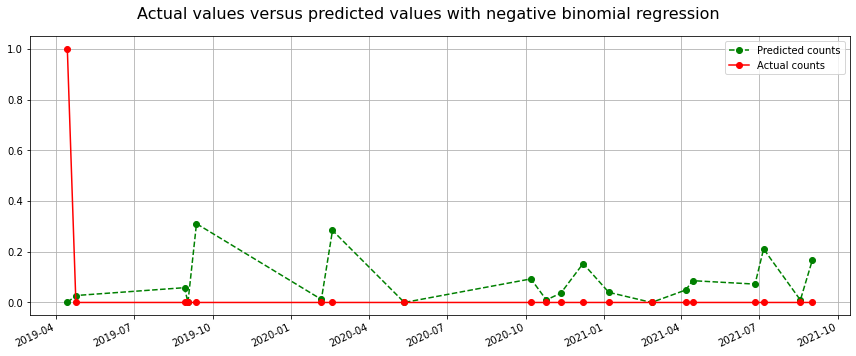

In [96]:
NB_predicted_counts=nbpredictions_summary_frame['mean']
actual_counts = y_test['admitted']
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Actual values versus predicted values with negative binomial regression', fontsize=16)
predicted, = plt.plot(X_test.admitted_date, NB_predicted_counts, 'go--', label='Predicted counts',)
actual, = plt.plot(X_test.admitted_date, actual_counts, 'ro-', label='Actual counts')
#plt.ylim(-0.1,1.1)
plt.legend(handles=[predicted, actual])
plt.xticks(rotation=25, ha='right')
plt.grid()
plt.tight_layout()
plt.savefig('../output/hospitalisation_risk/actual_predicted_NB2.jpg')
plt.show()

In [ ]:
#data['CCII'] = np.nan
#col0 = data.columns.get_loc('CCII')

# chalrson_point_1 = [data.columns.get_loc('mi_comor'), 
#                     data.columns.get_loc('cardiovascular_comor'),
#                     data.columns.get_loc('peripheral_vascular_comor'),
#                     data.columns.get_loc('chronic_obstructive_pulmonary_comor'),
#                     data.columns.get_loc('diabetes_comor'),
#                     data.columns.get_loc('dementia_comor'),
#                     data.columns.get_loc('peptic_ulcer_comor'),
#                     data.columns.get_loc('connective_tissue_comor'),
#                     data.columns.get_loc('mild_liver_comor')]

# chalrson_point_2 = [data.columns.get_loc('hemiplegia_comor'),
#                     data.columns.get_loc('mod_severe_renal_comor'),
#                     data.columns.get_loc('diabetes_complications_comor'),
#                     data.columns.get_loc('cancer_comor')]

# chalrson_point_3 = [data.columns.get_loc('mod_severe_liver_comor')]

# chalrson_point_4 = [data.columns.get_loc('metastatic_cancer_comor'),
#                     data.columns.get_loc('hiv_comor')]

In [ ]:
# for idx, x in enumerate(data['CCI']):
#     n=0
#     for y in chalrson_point_1:
#         if data.iat[idx, y] == 1:
#             n=n+1
#         data.iat[idx, col0]=n
#     for y in chalrson_point_2:
#         if data.iat[idx, y] == 1:
#             n=n+2
#         data.iat[idx, col0]=n
#     for y in chalrson_point_3:
#         if data.iat[idx, y] == 1:
#             n=n+3
#         data.iat[idx, col0]=n
#     for y in chalrson_point_4:
#         if data.iat[idx, y] == 1:
#             n=n+6
#         data.iat[idx, col0]=n

In [ ]:
#data.CCI.value_counts()

In [61]:
#ax = data['practice'].value_counts(np.nan).sort_index().plot(kind='bar', figsize=(10, 5), rot=0, color = 'blue', alpha=0.5)
#plt.xlabel('Practice')
#plt.ylabel('Percentage')
#plt.title('Percentage of practices')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
##plt.xlim(0, 100)
##plt.ylim(0, 1)
#plt.grid()
#plt.savefig(r'../output/hospitalisation_risk/practices.png', edgecolor='none')
#plt.show()

In [62]:
#sns.distplot(data['age'], hist=True, kde=True, 
#             bins=15, color = 'blue', 
#             #hist_kws={'edgecolor':'black'},
#             kde_kws={'linewidth': 2})

#plt.xlabel('Age')
##plt.ylabel('Frequency')
#plt.title('Histogram of age')
#plt.xlim(-10, 100)
##plt.ylim(0, 1100)
#plt.grid(True)
##plt.savefig(r'../output/hospitalisation_risk/antibacterial_prescirption.png', edgecolor='none')
#plt.show()

In [63]:
##data['age_cat'].value_counts().sort_index()

#data['age_cat'].value_counts(np.nan).sort_index().plot(kind='bar', figsize=(10, 5), rot=0, color = 'blue', alpha=0.5)
#plt.xlabel('Age category')
#plt.ylabel('Percentage')
#plt.title('Percentage of age categories')
##plt.xlim(0, 100)
#plt.ylim(0, 0.15)
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.grid()
#print(data['age_cat'].value_counts().sort_index())
#plt.savefig(r'../output/hospitalisation_risk/age_categories.png', edgecolor='none')
#plt.show()

In [64]:
#for i, binwidth in enumerate([1, 5, 10, 15]):
    
#    # Set up the plot
#    ax = plt.subplot(2, 2, i + 1)
#    
#    # Draw the plot
#    ax.hist(data['bmi'], bins = int(180/binwidth), 
#             color = 'blue', edgecolor = 'black')
    
#    # Title and labels
#    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
#    ax.set_xlabel('Delay (min)', size = 12)
#    ax.set_ylabel('Flights', size= 12)

#plt.tight_layout()
#plt.show()

In [65]:
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
#fig.suptitle('Vertically stacked subplots')

#ax1.hist(data['bmi'], bins = int(180/1), color = 'blue', edgecolor = 'black')
#ax2.hist(data['bmi'], bins = int(180/5), color = 'blue', edgecolor = 'black')
#ax3.hist(data['bmi'], bins = int(180/10), color = 'blue', edgecolor = 'black')
#ax4.hist(data['bmi'], bins = int(180/15), color = 'blue', edgecolor = 'black')

#plt.tight_layout()
#plt.show()

In [66]:
#fig, axs = plt.subplots(2, 2, 
#                        #figsize=(18, 14)
#                        )

#axs[0, 0].hist(data['bmi'], bins = int(180/1), color = 'blue', edgecolor = 'black')
#axs[0, 1].hist(data['bmi'], bins = int(180/5), color = 'blue', edgecolor = 'black')
#axs[1, 0].hist(data['bmi'], bins = int(180/10), color = 'blue', edgecolor = 'black')
#axs[1, 1].hist(data['bmi'], bins = int(180/15), color = 'blue', edgecolor = 'black')

#plt.tight_layout()
#plt.show()

In [67]:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
#fig.suptitle('Vertically stacked subplots')

#ax1.hist(data['bmi'], bins = int(180/1), color = 'blue', edgecolor = 'black')
#ax2.hist(data['bmi'], bins = int(180/5), color = 'blue', edgecolor = 'black')
#ax3.hist(data['bmi'], bins = int(180/10), color = 'blue', edgecolor = 'black')
#ax4.hist(data['bmi'], bins = int(180/15), color = 'blue', edgecolor = 'black')

#for ax in fig.get_axes():
#    ax.label_outer()
#    ax.set(xlabel='x-label', ylabel='y-label')

#plt.tight_layout()
#plt.show()